## 군집화
- 군집(clustering) 은 데이터셋을 클러스터라는 그룹으로 나누는 작업입니다. 한 클러스터 안의 데이터 포인트끼리는 매우 비슷하고 다른 클러스터의 데이터 포인트와는 구분되도록 나누는 것이 목표입니다. 분류와 비슷하게 데이터 포인트의 클러스터를 예측 및 할당합니다.<br><br>

* 각 군집화 기법은 나름의 장단점을 가지고 있으며 군집화하려는 데이터의 특성에 맞게 수행해야 함
* K-평균의 경우 거리 기반으로 군집 중심점을 이동시키면서 군집화를 수행. 매우 직관적인 알고리즘으로 많은 군집화 애플리케이션에 애용되지만 복잡한 구조를 가지는 데이터세트에 적용하기에는 한계가 있음. 
    - 평가는 실루엣 계수를 이용
    - 지도학습에 대한 평가는 실제 y값이 잇어야함 
    - 비지도학습이므로 실제 y값이 없음 -> 실루엣은 정확한 평가를 하기가 어려움<br><br>
* 평균이동(Mean Shift)은 K-평균과 유사하나 거리 중심이 아니고 데이터가 모여있는 밀도가 가장 높은 쪽으로 군집 중심점을 이동하면서 군집화를 수행. 
    - 컴퓨터 비전 영역에서 이미지나 영상 데이터의 특정 개체 구분에 적합한 알고리즘<br><br>
* GMM(Gausian Mixture Model)은 군집화를 적용하고자 하는 데이터를 여러 개의 가우시안 분포 모델을 섞어서 생성된 모델로 가정해 수행하는 방식. 
    - K-평균 보다 유연하고 다양한 데이터 세트에 잘 적용될 수 있으나 수행 시간이 오래 걸림<br><br>
* DBSCAN(Density Based Spatial Clustering of Applications with Noise)은 밀도 기반 군집화의 대표적인 알고리즘으로 데이터의 분포가 기하학적으로 복잡한 데이터 세트에 효과적인 군집화가 가능함

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])

iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [2]:
# 붗꽃 데이터 세트를 3개 그룹으로 군집화
# n_clusters 군집 개수, 초기 중심 설정 방식(default) k-means++, max_iter 최대 반복 횟수
# KMeans 객체 생성
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0) 
# KMeans 객체에 fit() 수행
kmeans.fit(iris_df)
print(kmeans.labels_) # 0, 1, 2 -> 3개의 군집을 의미함

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


### KMeans 파라미터
- n_cluster : 군집화할 개수(군집 중심점의 개수)

- init : 초기에 군집 중심점의 좌표를 설정할 방식. 

    - 보통은 K-means++(centroid 초기화 알고리즘) 방식으로 설정

- max_iter : 최대 반복 횟수. 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료
- 이렇게 수행된 KMeans 객체는 군집화 수행이 완료되어 군집화와 관련된 주요 속성을 알 수 있다.
- labels_를 활용하면 각 데이터 포인트가 속한 군집 중심점의 레이블(분류 클래스)을 알 수 있고,
- cluster_centers_를 통해 각 군집 중심점의 좌표(Shape는 [군집 개수, 피처 개수])를 알 수 있으며 
이를 통해 군집 중심점 좌표가 어디인지 시각화할 수 있다.

In [5]:
# 실제 붓꽃 품종 뷴류 값과 얼마나 차이가 나는지 군집화가 효과적으로 됐는지 확인
# 붓꽃 데이터 세트의 target 값을 'target'칼럼으로, 앞에서 구한 labels_ 값을 'cluster' 칼럼으로 지정
# # iris_df DataFrame에 추가
iris_df['target'] = iris.target
iris_df['cluster'] = kmeans.labels_

# group by 연산으로 실제 분류값인 target과 군집화 분류값인 cluster 값 비교
iris_result = iris_df.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

# 분류 타깃이 0값인 데이터는 1번 군집으로 모두 잘 그루핑됐다.
# Target 1값 데이터는 2개만 2번 군집으로 그루핑됐고, 나머지 48개는 모두 0번 군집으로 그루핑됐다.
# 하지만 Target 2값 데이터는 0번 군집에 14개, 2번 군집에 36개로 분산돼 그루핑됐다.

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [6]:
# 붓꽃 데이터 세트의 군집화 시각화
# 붓꽃 데이터 세트의 속성이 4개이므로 2차원 평면에 적합치 않아 PCA를 이용해 2개로 차원 축소
from sklearn.decomposition import PCA

pca = PCA(n_components =2)
pca_transformed = pca.fit_transform(iris.data)

iris_df['pca_x'] = pca_transformed[:,0]
iris_df['pca_y'] = pca_transformed[:,1]
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755


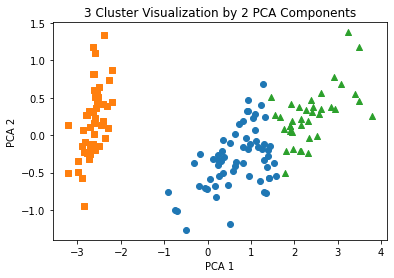

In [7]:
# pca_x는 X 좌표 값, pca_y는 Y 좌표 값
marker0_ind = iris_df[iris_df.cluster == 0].index
marker1_ind = iris_df[iris_df.cluster == 1].index
marker2_ind = iris_df[iris_df.cluster == 2].index

# 각 군집별로 cluster 0은 'o', cluster 1은 's', cluster 2는 '^'로 표현
plt.scatter(x=iris_df.loc[marker0_ind,'pca_x'], y=iris_df.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=iris_df.loc[marker1_ind,'pca_x'], y=iris_df.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=iris_df.loc[marker2_ind,'pca_x'], y=iris_df.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Cluster Visualization by 2 PCA Components')
plt.show()

# o와 ^는 상당 수준 분리되어 있지만, 네모만큼 명확하게 분리되어 있지 않음을 알 수 있다.

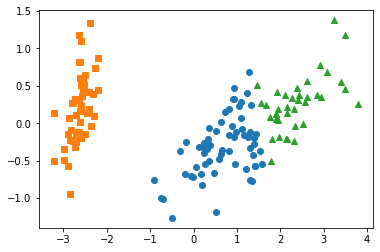

In [19]:
markers = ['o', 's', '^']
for i, j in zip(range(0, 3), markers):
    marker_ind = f'marker{i}_ind'
    marker_ind = iris_df[iris_df['cluster'] == i].index
    plt.scatter(x = iris_df.loc[marker_ind, 'pca_x'], y = iris_df.loc[marker_ind, 'pca_y'], marker = j)

## 군집 평가 
- 실루엣 분석으로 평가, 이를 위해 metrics 모듈의 silhouette_samples, silhouette_score을 이용

- 대부분의 군집화 데이터 세트는 타겟 레이블을 가지고 있지 않다.
- 비지도 학습의 특성상 정확하게 성능을 평가하기 어렵지만 군집화의 성능을 평가하는 방법으로 실루엣 분석 이용
- 실루엣 분석은 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는 지를 나타냄. 
- 효율적으로 잘 분리됐다는 것은 다른 군집과의 거리는 떨어져 있고 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐 있다는 의미
- 실루엣 계수는 -1에서 1사이의 값을 가지며 1로 가까워질수록 근처의 군집과 멀리 떨어져 있다는 것이고 0에 가까울수록 근처의 군집과 가까워진다는 것임.
 - 실루엣 계수 : s(i) = b(i) - a(i))/max(a(i),b(i)
   - a(i) : 해당 데이터 포인트와 같은 군집 내에 있는 다른 데이터 포인트와의 거리를 평균한 값
   - b(i) : 해당 데이터 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 평균 거리 
   - \- 값은 아예 다른 군집에 테이터 포인트가 할당되었음을 의미
- silhouette_samples : 인자로 X feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해 주면 각 데이터 포인트의 실루엣 계수를 반환
- silhouette_score : 인자로 X feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해 주면 전체 데이터의 실루엣 계수 값을 평균해 반환. 
    - 즉 np.mean(silhouette_samples())과 같음. 
    - 이 값이 높을수록 군집화가 잘 됐다고 판단할 수 있지만 무조건 높다고 해서 군집화가 잘되었다고는 할 수 없다.
- 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 함


In [8]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(irisDF)

irisDF['cluster'] = kmeans.labels_

# iris 의 모든 개별 데이터에 실루엣 계수값을 구함. 
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

silhouette_samples( ) return 값의 shape (150,)


In [10]:
# irisDF에 실루엣 계수 컬럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수값을 구함
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))
irisDF.head(3)

# 평균 실루엣 계수 값이 약 0.553
# 1번 군집의 경우 0.8 이상의 높은 실루엣 계수 값을 나타냄
# 1번 군집이 아닌 다른 군집의 경우 실루엣 계수 값이 평균보다 낮기 때문일 것이다.

붓꽃 데이터셋 Silhouette Analysis Score:0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


In [11]:
# 군집별 평균 실루엣 계수 값 > 군집 칼럼별로 그룹화하여 silhouette_coeff의 평균값을 구한다
irisDF.groupby('cluster')['silhouette_coeff'].mean()

# 1번 군집은 실루엣 계수 평균 값이 약 0.79인데 반해, 0번은 0.41, 2번은 0.45로 상대적으로 평균값이 1번에 비해 낮다

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

- 전체 데이터의 평균 실루엣 계수 값이 높다고 해서 반드시 최적의 군집 개수로 군집화가 잘 됐다고 볼 수는 없다. 특정 군집 내의 실루엣 계수 값만 너무 높고, 다른 군집은 내부 데이터끼리의 거리가 너무 떨어져 있어 실루엣 계수 값이 낮아져도 평균적으로 높은 값을 가질 수 있다.
- 따라서 개별 군집별로 적당히 분리된 거리를 유지하면서도 군집 내의 데이터가 서로 뭉쳐 있는 경우에 K-Means의 적절한 군집개수가 설정됐다고 판단할 수 있다.

### 군집화의 성능을 평가하는 대표적인 방법< 실루엣 분석 >

- 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타낸다. 효율적으로 잘 분리됐다는 것은 다른 군집과의 거리는 떨어져 있고 동일 군집끼리의 데이터는 가깝게 잘 뭉쳐 있다. 군집화가 잘 될수록 개별 군집은 비슷한 정도의 여유공간을 가지고 떨어져 있다.
- 실루엣 계수(개별 데이터가 가지는 군집화 지표)를 기반으로 한다
- 1 ~ 1 사이의 값을 가짐
- 1로 가까워질수록 근처의 군집과 더 멀리 떨어져 있다는 것을 의미
- 0에 가까울수록 근처의 군집과 가까워진다
- (-) 는 아예 다른 군집에 데이터 포인트가 할당되었다
- 전체 실루엣 계수의 평균값. 사이킷런의 silhouette_score() 값은 0~1 사이 값. 1에 가까울 수록 좋다.
- 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 한다. 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않는 것이 중요함

In [7]:
# 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [ ]:
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성  
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)  

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
# visualize_silhouette(군집개수, 피처 데이터 세트)
visualize_silhouette([ 2, 3, 4, 5], X)

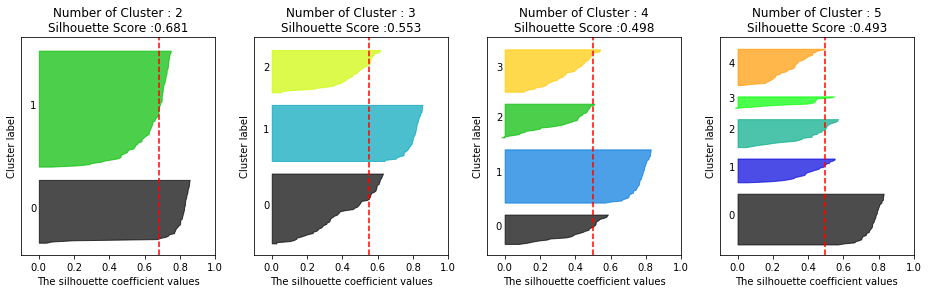

In [8]:
iris = load_iris()
visualize_silhouette([2,3,4,5], iris.data)